In [1]:
import math , copy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_house_data():
    data = np.loadtxt(r"D:\AndrewNgOptionalLabs\supervised\houses.txt", delimiter=',', skiprows=1)
    X = data[:,:4]
    y = data[:,4]
    return X, y

In [3]:
# load dataset
X_train , y_train = load_house_data()
X_features = ['size(sqft)' , 'bedrooms', 'floors' , 'age']

In [4]:
# compute cost
# mean squared error for our predictions
def compute_cost(X,y,w,b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(w , X[i]) + b
        cost = cost + (f_wb_i - y[i]) ** 2
    cost /= (2 * m)
    return cost

In [5]:
# gradient descent
def compute_gradient(X,y,w,b):
    m , n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.
    for i in range (m):
        # err =  f_wb -> (w * xi + b ) - y
        err = (np.dot(X[i],w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i,j]
        dj_db += err
    dj_dw /= m
    dj_db /= m
    return dj_dw , dj_db

In [6]:
def gradient_descent(X,y,w_in,b_in,cost_fun,gradient_fun,alpha,num):
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    for i in range(num):
        # Calculate the gradient and update the parameters
        dj_dw , dj_db = gradient_fun(X,y,w,b)

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # save the cost J 
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_fun(X, y, w, b))
         # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [7]:
#set alpha to 9.9e-7
m,n = X_train.shape
initial_w = np.zeros(n)
initial_b = 0
wfinal , bfinal , J_hist = gradient_descent(X_train, y_train,initial_w , initial_b ,compute_cost,compute_gradient, 9.9e-7 , 10)
wfinal

Iteration    0: Cost 95588.40   
Iteration    1: Cost 128212.81   
Iteration    2: Cost 172159.44   
Iteration    3: Cost 231357.56   
Iteration    4: Cost 311100.10   
Iteration    5: Cost 418516.84   
Iteration    6: Cost 563211.90   
Iteration    7: Cost 758122.43   
Iteration    8: Cost 1020675.34   
Iteration    9: Cost 1374345.39   


array([-0.86831498, -0.00165867, -0.0009115 , -0.02720726])

In [8]:
#set alpha to 9e-7
m,n = X_train.shape
initial_w = np.zeros(n)
initial_b = 0
wfinal , bfinal , J_hist = gradient_descent(X_train, y_train,initial_w , initial_b ,compute_cost,compute_gradient, 9e-7 , 10)
wfinal

Iteration    0: Cost 66461.58   
Iteration    1: Cost 61899.00   
Iteration    2: Cost 57657.21   
Iteration    3: Cost 53713.65   
Iteration    4: Cost 50047.37   
Iteration    5: Cost 46638.85   
Iteration    6: Cost 43469.97   
Iteration    7: Cost 40523.89   
Iteration    8: Cost 37784.94   
Iteration    9: Cost 35238.55   


array([ 7.73775314e-02,  8.27287625e-05, -1.06291972e-06, -4.19710549e-03])

In [9]:
# alpha = 1e-7
wfinal , bfinal , J_hist = gradient_descent(X_train, y_train,initial_w , initial_b ,compute_cost,compute_gradient, 1e-7 , 10)
wfinal

Iteration    0: Cost 44231.27   
Iteration    1: Cost 27646.12   
Iteration    2: Cost 17510.22   
Iteration    3: Cost 11315.74   
Iteration    4: Cost  7530.02   
Iteration    5: Cost  5216.39   
Iteration    6: Cost  3802.42   
Iteration    7: Cost  2938.26   
Iteration    8: Cost  2410.13   
Iteration    9: Cost  2087.34   


array([2.31283016e-01, 4.17834784e-04, 2.12498494e-04, 4.80830049e-03])

In [10]:
# feature scaling

In [11]:
def zscore_normalize_features(X):
    # finding mean 
    mu = np.mean(X,axis=0)
    # find std dev of each column
    sigma = np.std(X,axis=0)
    # zscore
    X_norm = (X - mu) / sigma

    return X_norm , mu , sigma

In [17]:
#check our work
# !pip install scikit-learn

In [18]:
from sklearn.preprocessing import scale
scale(X_train, axis=0, with_mean=True, with_std=True, copy=True)

array([[-4.23632450e-01,  4.33808841e-01, -7.89272336e-01,
         9.93726440e-01],
       [ 1.28427160e+00,  4.33808841e-01,  1.26698980e+00,
        -8.29542143e-01],
       [ 7.44933479e-01,  4.33808841e-01,  1.26698980e+00,
         1.40281572e-01],
       [ 1.31342501e+00,  4.33808841e-01,  1.26698980e+00,
        -9.07128040e-01],
       [-2.53570880e-01, -1.10001528e+00, -7.89272336e-01,
        -9.45920989e-01],
       [-1.34682383e+00, -1.10001528e+00, -7.89272336e-01,
         1.07131234e+00],
       [ 1.01460254e+00,  4.33808841e-01, -7.89272336e-01,
        -8.29542143e-01],
       [-9.53252767e-01,  4.33808841e-01, -7.89272336e-01,
         1.79074520e-01],
       [ 4.31379699e+00,  1.96763296e+00,  1.26698980e+00,
         1.88596426e+00],
       [-1.53146210e+00, -1.10001528e+00, -7.89272336e-01,
         1.61441362e+00],
       [-5.30528294e-01, -1.10001528e+00,  1.26698980e+00,
        -8.29542143e-01],
       [ 3.36785712e-01, -1.10001528e+00, -7.89272336e-01,
      

In [20]:
X_norm , X_mu , X_sigma = zscore_normalize_features(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

X_mu = [1.41837374e+03 2.71717172e+00 1.38383838e+00 3.83838384e+01], 
X_sigma = [411.61562893   0.65196523   0.48631932  25.77788069]
Peak to Peak range by column in Raw        X:[2.406e+03 4.000e+00 1.000e+00 9.500e+01]
Peak to Peak range by column in Normalized X:[5.8452591  6.13529646 2.05626214 3.68533012]


In [22]:
w_norm, b_norm, hist = gradient_descent(X_norm, y_train,initial_w , initial_b ,compute_cost,compute_gradient,1.0e-1,1000)

Iteration    0: Cost 57617.03   
Iteration  100: Cost   221.09   
Iteration  200: Cost   219.21   
Iteration  300: Cost   219.21   
Iteration  400: Cost   219.21   
Iteration  500: Cost   219.21   
Iteration  600: Cost   219.21   
Iteration  700: Cost   219.21   
Iteration  800: Cost   219.21   
Iteration  900: Cost   219.21   


In [30]:
# prediction using normalized features
m = X_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_norm[i] , w_norm) + b_norm

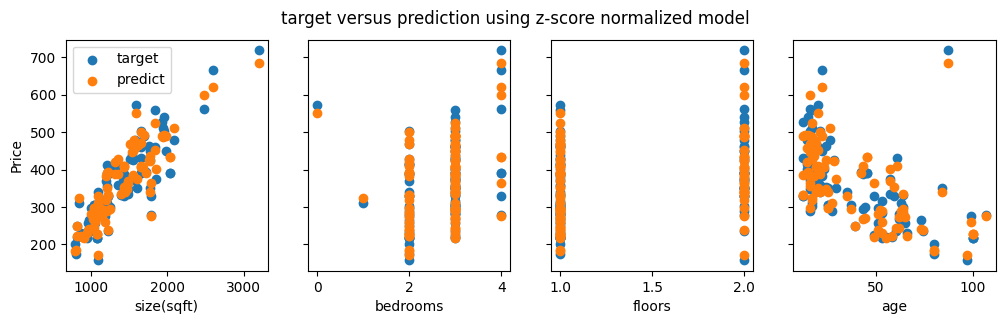

In [31]:
# plot predictions and targets versus original features    
fig,ax=plt.subplots(1,4,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],yp, label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

Prediction The point of generating our model is to use it to predict housing prices that are not in the data set. Let's predict the price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old. Recall, that you must normalize the data with the mean and standard deviation derived when the training data was normalized.

In [34]:
# prediction out of the data set
X_house = np.array([1200,3,1,40])
X_house_norm = (X_house - X_mu) / X_sigma
print(X_house_norm)
X_house_predict = np.dot(X_house_norm , w_norm ) + b_norm
print(f" predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = ${X_house_predict*1000:0.0f}")

[-0.53052829  0.43380884 -0.78927234  0.06269567]
 predicted price of a house with 1200 sqft, 3 bedrooms, 1 floor, 40 years old = $318709
